# Prosper Loan Data Exploration
## Magalaweng Clive Mmakola

## Dataset Overview

- This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Investigation Overview

### Univariate Exploration

- Most borrowers preffered the 36 months loan term and this might be because the borrower rate is more reasonable depending which type of borrower

### Bivariate-Exploration

- Most of the borrowers preffered by lenders are those who are Employed, those who are homeowners, with high Prosper rating and score and those who are in the hight income range, and this might be because those in these categories are less likely to default

### Multivariate-Exploration

- Whether a borrower is a homeowner or not alone does not seem to have more effect on the borrower is approved for the loan or not
- The loan amount one takes is hightly correlated to the amount they will have to pay monthly and this also applies to the rates and the term of the loan

## Key Insights for Presentation

- Whether a borrower is a homeowner or not alone does not seem to have more effect on the borrower is approved for the loan or not
- The loan amount one takes is hightly correlated to the amount they will have to pay monthly and this also applies to the rates and the term of the loan

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

font = {
    'family': 'DejaVu Sans',
    'color': '#999999',
    'size': 12
}

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')
mask = [
    'BorrowerAPR','Term', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus',
    'EmploymentStatusDuration', 'CreditScoreRangeLower','BorrowerRate', 'ProsperScore', 'CreditScoreRangeUpper',
    'IsBorrowerHomeowner','MonthlyLoanPayment','CurrentDelinquencies', 'AmountDelinquent',
    'DebtToIncomeRatio', 'IncomeRange', 'LoanOriginalAmount', 'LoanOriginationDate', 'InvestmentFromFriendsCount'
    , 'InvestmentFromFriendsAmount', 'Investors'
]

loans_features = loans[mask]

listing_cat = {
    0: 'Not Available', 1: 'Debt Consolidation',
    2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
    5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption',
    9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans',
    13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental',
    16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'
}

loans_features.replace(to_replace={'ListingCategory (numeric)': listing_cat}, inplace=True)
loans_features.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

    
def barhPlot(data, locs, labels_list, bar_title, x_label, y_label):
    '''Helps plot a horizontal bar chart
    
       Arguments
       ---------
       data: Pandas Series of proportions or counts
       locs: A list of integers where the bars will be located
       label_list: A list of string type labels for the x-axis ticks
       bar_title: A string type descriptive title for the plot
       x_label: A string type label for the x-axis
       y_label: A string type label for the y-axis
       
       Returns
       -------
       A horizontal bar plot of the data
    '''
    plt.barh(locs, data, tick_label=labels_list)
    plt.title(bar_title, fontdict=font)
    plt.xlabel(x_label, fontdict=font)
    plt.ylabel(y_label, fontdict=font)
    
def countPlot(data, x_values, hue_col, count_title, x_label, y_label):
    '''Helps plot a histogram
    
       Arguments
       ---------
       data: DataFrame, array, or list of arrays
       x_values: x_co-ordinates to plot
       hue_col: column of values for clustering
       plot_title: A string type(text) descriptive title for the plot
       x_label: A string type(text) label for the x-axis
       y_label: A string type(text) label for the y-axis
       bins: int or sequence or str
             If bins is an integer, it defines the number of equal-width bins in the range
             If bins is a sequence, it defines the bin edges,
             including the left edge of the first bin and the right edge of the last bin
       
       Returns
       -------
       A vertical bar plot of the data
    '''
    sb.countplot(data=data, x=x_values, hue=hue_col, palette='viridis_r')
    plt.title(count_title, fontdict=font)
    plt.xlabel(x_label, fontdict=font)
    plt.ylabel(y_label, fontdict=font)
    
loans_features_sample = loans_features.sample(250)

## Count of Loans Per Term(IsBorrowerHomeowner)

- The loan 36 months loan term is mostly favoured by borrowers
- Borrowers who are not homeowners being the most with loans under the 36 month term and those who are homeowners being more in the 60 month loan term

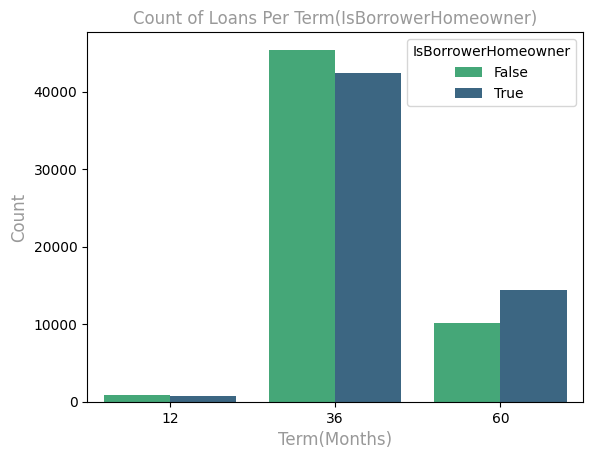

In [3]:
# Check favoured loan term by Borrowers who are homeowners
IBH_title = 'Count of Loans Per Term(IsBorrowerHomeowner)'
countPlot(loans_features, 'Term', 'IsBorrowerHomeowner', IBH_title, 'Term(Months)', 'Count')

## Count of Loans Per Term (ProsperRating)

- Borrowers with an `AA` rating have less loans in all terms categories
- Most borrowers in the 36 month loan term are of the rating class `A` followed by class `C`
- In the 60 month loan term there are more borrowers of class `C` followed by those of rating class `B`

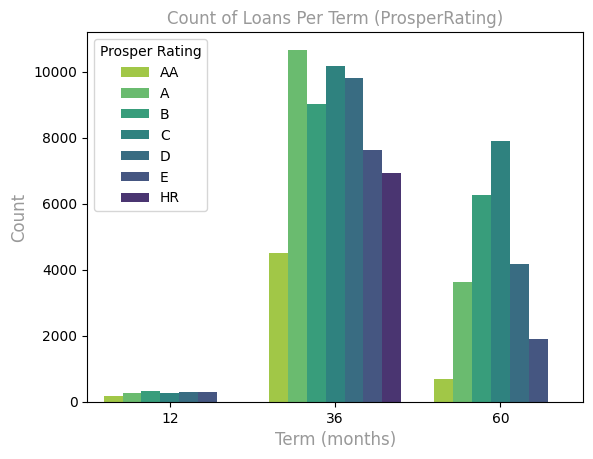

In [4]:
order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sb.countplot(data=loans_features, x='Term', hue='ProsperRating (Alpha)', hue_order=order, palette='viridis_r')
plt.title( 'Count of Loans Per Term (ProsperRating)', fontdict=font)
plt.xlabel('Term (months)', fontdict=font)
plt.ylabel('Count', fontdict=font)
plt.legend(title='Prosper Rating');

## Proportion of Loans for Each Income Range

- Borrowers with most loans listed fall in the `25_000 - 49_999` Dollars, followed by those in the `50_000 - 74_999` Dollars income range.
- Those in the high income range are less and this might be because they have no reasons to take loans or that they are a small portion of the data set.
- Those in the low income ranges also have the least loans listed and the reason for this might just be the same as the above mentioned reason of the high income range borrowers.

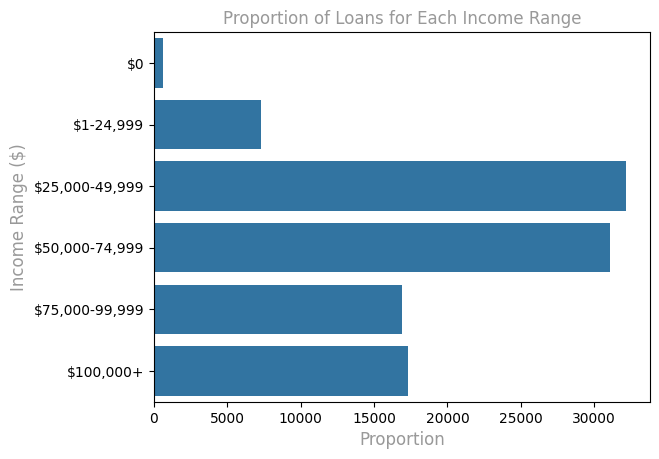

In [5]:
color = sb.color_palette()[0]
order = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]
sb.countplot(data=loans_features, y='IncomeRange', color=color, order=order)
plt.title('Proportion of Loans for Each Income Range', fontdict=font)
plt.xlabel('Proportion', fontdict=font)
plt.ylabel('Income Range ($)', fontdict=font);

## Borrower APR vs Borrower Rate(IsBorrowerHomeowner)

- Being a homeowner does not really affect the rate as much.
- This might be because maybe some homeowners had a bad scores or ratings and so their rates increased

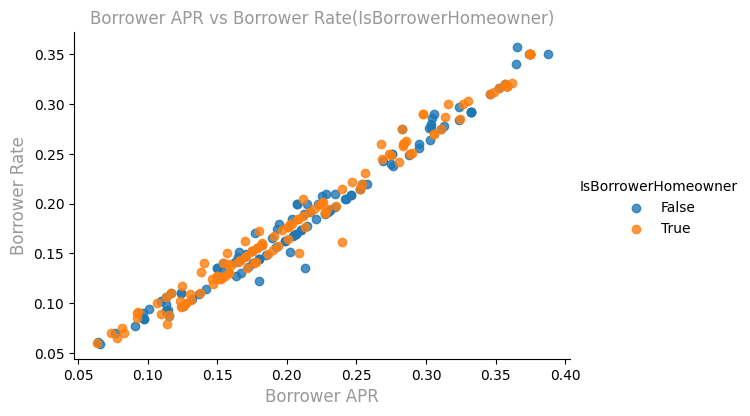

In [6]:
g = sb.FacetGrid(data=loans_features_sample, hue='IsBorrowerHomeowner',
                 height=4, aspect=1.5)
g.map(sb.regplot, 'BorrowerAPR', 'BorrowerRate',
     fit_reg=False)
g.add_legend()
plt.title('Borrower APR vs Borrower Rate(IsBorrowerHomeowner)', fontdict=font)
plt.xlabel('Borrower APR', fontdict=font)
plt.ylabel('Borrower Rate', fontdict=font);

## Borrower APR vs Borrower Rate (Term)

- There seems to be an increase in the rates the longer the term of the loan, which might be the reason why borrowers preffered the 36 months loan term since it is neither long nor short, making it perfect to budget for. 

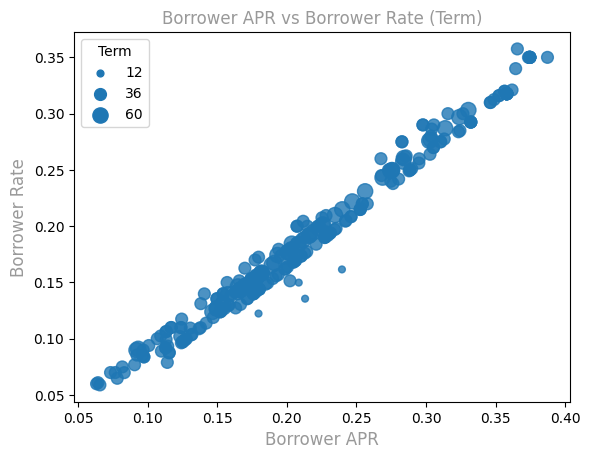

In [7]:
sb.regplot(data=loans_features_sample, x='BorrowerAPR', y='BorrowerRate', fit_reg=False,
            scatter_kws={'s': loans_features_sample['Term']*2})
sizes = [12, 36, 60]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s*2, color=base_color))
    
plt.legend(legend_obj, sizes, title='Term')
plt.title('Borrower APR vs Borrower Rate (Term)', fontdict=font)
plt.xlabel('Borrower APR', fontdict=font)
plt.ylabel('Borrower Rate', fontdict=font);

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 819937 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
Opening in existing browser session.
